# Build/train object model

In [ ]:
!git clone https://github.com/khanhha1005/Bag-of-visual-word.git

Cloning into 'Bag-of-visual-word'...
remote: Enumerating objects: 864, done.
remote: Total 864 (delta 0), reused 0 (delta 0), pack-reused 864
Receiving objects: 100% (864/864), 162.46 MiB | 31.96 MiB/s, done.
Checking out files: 100% (1017/1017), done.


In [ ]:
import argparse
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


Đọc ảnh 

In [ ]:
def getFiles(train, path):
    images = []
    count = 0
    for folder in os.listdir(path):
        for file in  os.listdir(os.path.join(path, folder)):
            images.append(os.path.join(path, os.path.join(folder, file)))
    if(train is True):
        np.random.shuffle(images)
    return images 
def readImage(img_path):
    img = cv2.imread(img_path, 0)
    return cv2.resize(img,(150,150))  
test_images = getFiles(True, '/content/Bag-of-visual-word/dataset/train')
list_cac_anh = []
name_dict =	{
    "0": "background",
    "1": "face",
}
for img_path in test_images:
    img = readImage(img_path)
    if("face" in img_path):
        list_cac_anh.append("face")
    else:
        list_cac_anh.append("background")

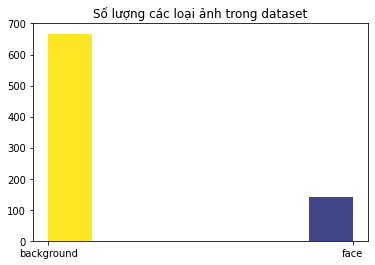

In [ ]:
import numpy as np
from matplotlib import colors
fig, axs = plt.subplots()
N, bins, patches = axs.hist(list_cac_anh, bins=7)
fracs = N / N.max()

norm = colors.Normalize(fracs.min(), fracs.max())
plt.title("Số lượng các loại ảnh trong dataset")
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)


In [ ]:
def getDescriptors(sift, img):
    kp, des = sift.detectAndCompute(img, None)
    return des

def readImage(img_path):
    img = cv2.imread(img_path, 0)
    return cv2.resize(img,(150,150))
images = getFiles(True,'/content/Bag-of-visual-word/dataset/train')
sift = cv2.xfeatures2d.SIFT_create()
descriptor_list = []
train_labels = np.array([])
label_count = 2
image_count = len(images)

for img_path in images:
    if("face" in img_path):
        class_index = 1
    else:
        class_index = 0

    train_labels = np.append(train_labels, class_index)
    img = readImage(img_path)
    des = getDescriptors(sift, img)
    descriptor_list.append(des)


In [ ]:
def vstackDescriptors(descriptor_list):
# Stack arrays in sequence vertically (row wise).
    descriptors = np.array(descriptor_list[0])
    for descriptor in descriptor_list[1:]:
        descriptors = np.vstack((descriptors, descriptor)) 
    return descriptors

def clusterDescriptors(descriptors, no_clusters):
    kmeans = KMeans(n_clusters = no_clusters).fit(descriptors)
    return kmeans

def extractFeatures(kmeans, descriptor_list, image_count, no_clusters):
  
    im_features = np.array([np.zeros(no_clusters) for i in range(image_count)])

    for i in range(image_count):
        for j in range(len(descriptor_list[i])):
            feature = descriptor_list[i][j]
            feature = feature.reshape(1, 128)
            idx = kmeans.predict(feature)
            im_features[i][idx] += 1

    return im_features




k-means = 20

In [ ]:
descriptors = vstackDescriptors(descriptor_list)
kmeans = clusterDescriptors(descriptors, 100)

im_features = extractFeatures(kmeans, descriptor_list, image_count, 100)

scale = StandardScaler().fit(im_features)        
im_features = scale.transform(im_features)


In [ ]:
def findSVM(im_features, train_labels):
    features = im_features
    svm = SVC(kernel = 'linear',gamma = 'auto')
    svm.fit(features, train_labels)
    return svm
    
def findAccuracy(true, predictions):
    print ('accuracy score: %0.3f' % accuracy_score(true, predictions))

def findLR(im_features, train_labels):
    features = im_features
    logistic = LogisticRegression().fit(features, train_labels)
    return logistic

In [ ]:
svm = findSVM(im_features, train_labels)
print("SVM fitted.")
print("Training completed.")

SVM fitted.
Training completed.


In [ ]:
lr = findLR(im_features, train_labels)
print("LogisticRegression fitted.")
print("Training completed.")

LogisticRegression fitted.
Training completed.


**Test with SVM**

In [ ]:
test_images = getFiles(False, '/content/Bag-of-visual-word/dataset/test')
count = 0
true = []
descriptor_list = []
name_dict =	{
    "0": "background",
    "1": "face",
}
sift = cv2.xfeatures2d.SIFT_create()
for img_path in test_images:
    img = readImage(img_path)
    des = getDescriptors(sift, img)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
        if("face" in img_path):
            true.append("face")
        else:
            true.append("background")

descriptors = vstackDescriptors(descriptor_list)

test_features = extractFeatures(kmeans, descriptor_list, count, 100)

test_features = scale.transform(test_features)

kernel_test = test_features

predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]

findAccuracy(true, predictions)
print("Accuracy calculated.")


accuracy score: 0.914
Accuracy calculated.


**Test with LogisticRegression**

In [ ]:
test_images = getFiles(False, '/content/Bag-of-visual-word/dataset/test')
count = 0
true = []
descriptor_list = []
name_dict =	{
    "0": "background",
    "1": "face",
}
sift = cv2.xfeatures2d.SIFT_create()
for img_path in test_images:
    img = readImage(img_path)
    des = getDescriptors(sift, img)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
        if("face" in img_path):
            true.append("face")
        else:
            true.append("background")

descriptors = vstackDescriptors(descriptor_list)

test_features = extractFeatures(kmeans, descriptor_list, count, 100)

test_features = scale.transform(test_features)

kernel_test = test_features

predictions = [name_dict[str(int(i))] for i in lr.predict(kernel_test)]

findAccuracy(true, predictions)
print("Accuracy calculated.")


accuracy score: 0.933
Accuracy calculated.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2.png to 2.png


['face']


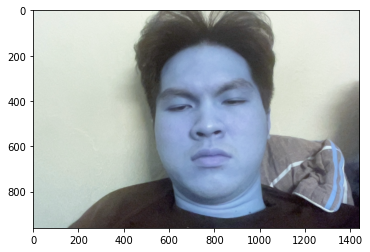

In [ ]:
count = 0
descriptor_list = []
j = list((uploaded.keys()))[0]
%matplotlib inline

img1 = cv2.imread('/content/'+str(j))

plt.imshow(img1)
name_dict =	{
    "0": "background",
    "1": "face",
}
sift = cv2.xfeatures2d.SIFT_create()
img = readImage('/content/'+str(j))
des = getDescriptors(sift, img)
if(des is not None):
    count += 1
    descriptor_list.append(des)
descriptors = vstackDescriptors(descriptor_list)
test_features = extractFeatures(kmeans, descriptor_list, count, 100)
test_features = scale.transform(test_features)
kernel_test = test_features


predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
print(predictions)


# Generate candidates in new image

imutils


A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges, and much more easier with OpenCV and both Python 2.7 and Python 3.

In [ ]:
import imutils
#pyramid image 
def pyramid(image, scale=1.5, minSize=(30, 30)):
	yield image
	while True:
		# resize ảnh
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
		yield image

def sliding_window(image, stepSize, windowSize):
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

#Before NMS


['background']
['face']
['face']
['face']
['face']
['face']
['face']
['background']
['background']
['face']
['face']
['face']
['face']
['face']
['background']
['face']
['face']
['face']
['face']
['face']
['face']
['face']
['background']
['face']
['face']


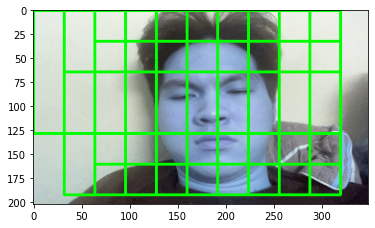

In [ ]:
import cv2
import matplotlib.pyplot as plt
j = list((uploaded.keys()))[0]
%matplotlib inline

image = cv2.imread('/content/'+str(j))
(winW, winH) = (128, 128)
image = cv2.resize(image, (349,202))
l = [ ]
%matplotlib inline
for resized in pyramid(image, scale=1.5):
  # loop over the sliding window for each layer of the pyramid
  for (x, y, window) in sliding_window(resized, stepSize=15, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
      continue
    #classifer 
    count = 0
    descriptor_list = []
    name_dict = {
        "0": "background",
        "1": "face",
    }
    sift = cv2.xfeatures2d.SIFT_create()
    des = getDescriptors(sift, window)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
    descriptors = vstackDescriptors(descriptor_list)
    test_features = extractFeatures(kmeans, descriptor_list, count, 100)
    test_features = scale.transform(test_features)
    kernel_test = test_features

    predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
    print(predictions)
    if predictions == ['face']:
      l.append([x, y, x + winW, y + winH])


for (x, y, k, k1) in l:
  cv2.rectangle(image, (x, y), (k, k1), (0, 255, 0), 2)
  plt.imshow(image)
      

# Apply Non Maximum Supression for SVM



In [ ]:
import numpy as np
def non_max_suppression_slow(boxes, overlapThresh):
	if len(boxes) == 0:
		return []
	pick = []
  # Tìm tọa độ của điểm trên cùng bên trái và điểm dưới cùng bên phải  của từng box 
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,0]+boxes[:,2]
	y2 = boxes[:,1]+boxes[:,3]
  # Tìm diện tích của  box
	area = (x2 - x1 ) * (y2 - y1 )
 # Để lấy các chỉ mục của tọa độ đã sắp xếp của tọa độ y dưới cùng bên phải của các hộp giới hạn. 
	idxs = np.argsort(y2)
 #Returns the indices that would sort an array.
	while len(idxs) > 0:
    # lấy box để xét
		last = len(idxs) - 1
		i = idxs[last]
    # cho box vào tập keep
		pick.append(i)
  #  loại  box ra khoỉ tập P
		suppress = [last]
		for pos in range(0, last):
			j = idxs[pos]
      # Tìm tọa đọ của vùng giao nhau (Intersection)
			xx1 = max(x1[i], x1[j])
			yy1 = max(y1[i], y1[j])
			xx2 = min(x2[i], x2[j])
			yy2 = min(y2[i], y2[j])
      # Tìm tọa đọ của vùng giao nhau (Intersection)
			w = max(0, xx2 - xx1 )
			h = max(0, yy2 - yy1 )
			# Tinhs iou
			overlap = float(w * h) / area[j]
			# Nếu có box nào trong P có IOU với box S đang xét mà lớn hơn ngưỡng thresh_iou thì loại bỏ box đó ra khỏi P
			if overlap > overlapThresh:
				suppress.append(pos)
		idxs = np.delete(idxs, suppress)
	return boxes[pick]

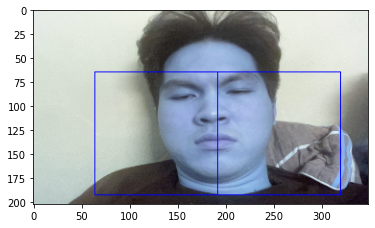

In [ ]:
import cv2
import matplotlib.pyplot as plt
j = list((uploaded.keys()))[0]
%matplotlib inline

image = cv2.imread('/content/'+str(j))
(winW, winH) = (128, 128)
%matplotlib inline
detections = []
image = cv2.resize(image, (349,202))

for resized in pyramid(image, scale=1.5):
  cd = []
  for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
    if window.shape[0] != winH or window.shape[1] != winW:
      continue
    count = 0
    descriptor_list = []
    name_dict = {
        "0": "background",
        "1": "face",
    }
    sift = cv2.xfeatures2d.SIFT_create()
    des = getDescriptors(sift, window)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
    descriptors = vstackDescriptors(descriptor_list)
    test_features = extractFeatures(kmeans, descriptor_list, count, 100)
    test_features = scale.transform(test_features)
    kernel_test = test_features
    predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
    if predictions == ['face']:
      clone = resized.copy()
      cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
      plt.imshow(clone)
      # Perform Non Maxima Suppression
      detections.append([x, y, winW, winH])
detections = non_max_suppression_slow(np.array(detections), 0)
# Display the results 
for (x_tl, y_tl,  w, h) in detections:
    cv2.rectangle(image, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 0, 255))
    plt.imshow(image)


# Apply Non Maximum Supression for Logistic regression


Probability estimates.

The returned estimates for all classes are ordered by the label of classes.

For a multi_class problem, if multi_class is set to be “multinomial” the softmax function is used to find the predicted probability of each class. Else use a one-vs-rest approach, i.e calculate the probability of each class assuming it to be positive using the logistic function. and normalize these values across all the classes

In [ ]:
def overlapping_area(detection_1, detection_2):

    # Tìm tọa độ của điểm trên cùng bên trái và điểm dưới cùng bên phải  của từng box 
    x1_tl = detection_1[0]
    y1_tl = detection_1[1]
    x1_br = detection_1[0] + detection_1[2]
    y1_br = detection_1[1] + detection_1[3]

    x2_tl = detection_2[0]
    x2_br = detection_2[0] + detection_2[2]
    y2_tl = detection_2[1]
    y2_br = detection_2[1] + detection_2[3]
    # Tìm các cạnh của vùng giao nhau (Intersection)
    x_overlap = max(0, min(x1_br, x2_br)-max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br)-max(y1_tl, y2_tl))
    #Tính diện tích vùng giao nhau
    overlap_area = x_overlap * y_overlap
    # Tìm diện tích của 2 box
    area_1 = detection_1[2] * detection_2[3]
    area_2 = detection_2[2] * detection_2[3]
    # Tính diện tích phần hợp nhau
    total_area = area_1 + area_2 - overlap_area
    # tính iou
    return overlap_area / float(total_area)

def nms(detections, threshold=.3):
    if len(detections) == 0:
      return []
    #  Chọn box S có confidence score cao nhất trong tập P, loại bỏ box đó ra khỏi tập P và thêm box đó vào tập keep
    detections = sorted(detections, key=lambda detections: detections[4],
            reverse=True)
    new_detections=[]
    new_detections.append(detections[0])
    del detections[0]
    # Thực hiện tính toán IOU giữa box S vừa lấy ra ở bước 1 với toàn bộ các box còn lại trong tập P. Nếu có box nào trong P có IOU với box S đang xét mà lớn hơn ngưỡng thresh_iou thì loại bỏ box đó ra khỏi P
    for index, detection in enumerate(detections):
        for new_detection in new_detections:
            if overlapping_area(detection, new_detection) > threshold:
                del detections[index]
                break
        else:
            new_detections.append(detection)
            del detections[index]
    
    return new_detections


[[32, 0, 128, 128, 0.6837390896997462], [64, 0, 128, 128, 0.9235217595609376], [96, 0, 128, 128, 0.9890253180266522], [128, 0, 128, 128, 0.933713954949519], [160, 0, 128, 128, 0.969392106691698], [192, 0, 128, 128, 0.73922879553826], [32, 32, 128, 128, 0.5368223363586002], [64, 32, 128, 128, 0.7910021733004972], [96, 32, 128, 128, 0.9911427862712602], [128, 32, 128, 128, 0.9354772675549253], [160, 32, 128, 128, 0.5435627518763386], [32, 64, 128, 128, 0.685975710492183], [64, 64, 128, 128, 0.8699548549848121], [96, 64, 128, 128, 0.9961181409618092], [128, 64, 128, 128, 0.958482472420085], [0, 0, 128, 128, 0.7194990772705503], [32, 0, 128, 128, 0.6892163433216405], [64, 0, 128, 128, 0.9113842613048063], [96, 0, 128, 128, 0.6261809862305961]]
[[96, 64, 128, 128, 0.9961181409618092], [160, 0, 128, 128, 0.969392106691698], [32, 0, 128, 128, 0.6892163433216405]]


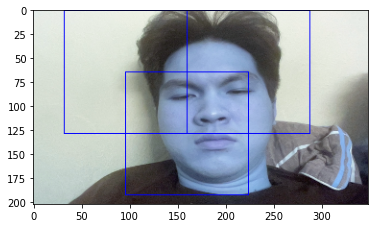

In [ ]:
import cv2
import matplotlib.pyplot as plt
j = list((uploaded.keys()))[0]
%matplotlib inline

image = cv2.imread('/content/'+str(j))
(winW, winH) = (128, 128)
%matplotlib inline
detections = []
image = cv2.resize(image, (349,202))

for resized in pyramid(image, scale=1.5):
  cd = []
  for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
    if window.shape[0] != winH or window.shape[1] != winW:
      continue
    count = 0
    descriptor_list = []
    name_dict = {
        "0": "background",
        "1": "face",
    }
    sift = cv2.xfeatures2d.SIFT_create()
    des = getDescriptors(sift, window)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
    descriptors = vstackDescriptors(descriptor_list)
    test_features = extractFeatures(kmeans, descriptor_list, count, 100)
    test_features = scale.transform(test_features)
    kernel_test = test_features
    predictions = [name_dict[str(int(i))] for i in lr.predict(kernel_test)]
    if predictions == ['face']:
      clone = resized.copy()
      cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
      plt.imshow(clone)
      # Perform Non Maxima Suppression
      detections.append([x, y, winW, winH,np.max(lr.predict_proba(kernel_test))])
print(detections)
detections = nms(detections, 0.2)
print(detections)
# Display the results after performing NMS
for (x_tl, y_tl,  w, h,r) in detections:
    # Draw the detections
      # clone = resized.copy()
      # cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
      # plt.imshow(clone)
    cv2.rectangle(image, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 0, 255))
    plt.imshow(image)


In [ ]:
if __name__ == "__main__":
    # Example of how to use the NMS Module
    print("Detections before NMS = {}".format(detections))
    print("Detections after NMS = {}".format(nms(detections)))

Detections before NMS = [[96, 64, 128, 128, 0.9961181409618092], [160, 0, 128, 128, 0.969392106691698], [32, 0, 128, 128, 0.6892163433216405]]
Detections after NMS = [[96, 64, 128, 128, 0.9961181409618092], [160, 0, 128, 128, 0.969392106691698]]


Thử object detection 

Thử feature matching 


Thử các loại object detection khác 


# Tài liệu tham khảo

https://pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/


https://www.youtube.com/watch?v=SPXocFBjr70